<center> <h1>Millikan : exploitation des mesures</h1> </center>

Ce notebook vous permettra à partir des mesures, d'obtenir les résultats et tracés nécessaires à l'analyse de vos expériences de Millikan.

Des cellules de textes placées avant les cellules de codes viennent vous expliquer étape par étapes ce que fait le code.

Nous vous recommandons d'installer anaconda si vous voulez exploiter ce code.

Import des librairies nécessaires.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

Liste de mesures (mettre X1 et X2 en terme de graduation) et enregistrement au bon format (un tableau par type de mesure, et le stack des quatre tableaux de mesure):

X1=np.array([70,55,70,45,55,75,65,55,50,55,40,65,63,70,60,65,80])
X2=np.array([60,40,55,30,30,60,50,40,40,45,20,55,53,60,50,55,70])

t=np.array([29.5,23.9,23.6,15.3,10.1,31.2,20.2,15.2,24.1,18.7,13.8,18.2,27.5,23.8,18.2,24.3,22.7])
V=np.array([22,220,203,195,200,123,90,123,105,140,95,97,185,40,40,167,90])

tot=np.stack((X1,X2,t,V))
print(tot)
np.savetxt("ALL_test",tot)

Récupérations des datas sauvegarder au bon format :

In [24]:
tot=np.loadtxt("NappaMartonTeilletParot_Millikan")

X1=tot[0]
X2=tot[1]
t=tot[2]
V=tot[3]

Définition des constantes nécessaires :

In [25]:
rho=900
rho_a=1.29
g=9.807

eta=18*10**(-6)
Drho=5
h=0.006
qth=1.602*10**(-19)

Estimation/définition des incertitudes directes :

In [26]:
Dd=0.5*50*10**(-6)
DV=10
Dt=1

Détermination de la vitesse des gouttes et des incertitudes associées :

In [27]:
d=abs(X1-X2)*50*10**(-6)
v=d/t

Dv=v*((Dd/d)**2+(Dt/t)**2)**0.5

Détermination des charges mesurées, de leurs incertitudes et du nombre de charges élémentaires qu'elles contiennent :

In [28]:
q=(18*np.pi*h*(eta*v)**1.5)/(V*(2*(rho-rho_a)*9.81)**0.5)
print(q)
denom=(2*(rho-rho_a)*g)**0.5
facteur=18*np.pi*h*((eta)**1.5)/denom
A=3*v**0.5/(V*2)
B=v**1.5/V**2
C=(v**1.5/V)*(2*g/denom**2)
dq2=facteur**2*(A**2*Dv**2+B**2*DV**2+C**2*Drho**2)
Dq=dq2**0.5
print(Dq)
nbq=np.around(q/qth,decimals=0)

[2.00250433e-19 3.22600352e-19 2.56802679e-19 1.56264606e-19
 3.45714887e-19 2.48191816e-19 2.38649945e-19 2.56411056e-19
 4.89285570e-19 3.57781818e-19 3.41270069e-19 3.12375387e-19
 2.12855567e-19 1.76147055e-19 2.43156683e-19 4.28945099e-19
 3.40056421e-19 5.16460185e-19 3.62049016e-19 9.47485684e-19
 2.71092010e-19 6.34131104e-19 1.27293231e-19 4.14742297e-19
 1.41042220e-19]
[1.12788711e-19 4.40138239e-20 3.78238271e-20 8.41332583e-21
 2.09858427e-20 2.40650041e-20 2.22517425e-20 3.45141427e-20
 8.48720323e-20 2.53763737e-20 2.21595812e-20 2.54573013e-20
 2.50324556e-20 2.39589664e-20 3.49933640e-20 6.72161360e-20
 3.43177019e-20 6.02503142e-20 3.27805111e-20 1.20996814e-19
 2.91026196e-20 8.40216081e-20 7.75159110e-21 3.81657884e-20
 1.36521667e-20]


Détermination du rayon des gouttes mesurées et des incertitudes associées :

In [29]:
r=3*(v*eta)**0.5/denom
Dr=((3*(eta**0.5)/denom*0.5/v**0.5)**2*Dv**2+(3*(v*eta/(2*g))**0.5*(-0.5)/(rho-rho_a)**1.5)**2*Drho**2)**0.5

Plot de la charge mesurée en fonction du numéro de la mesure :

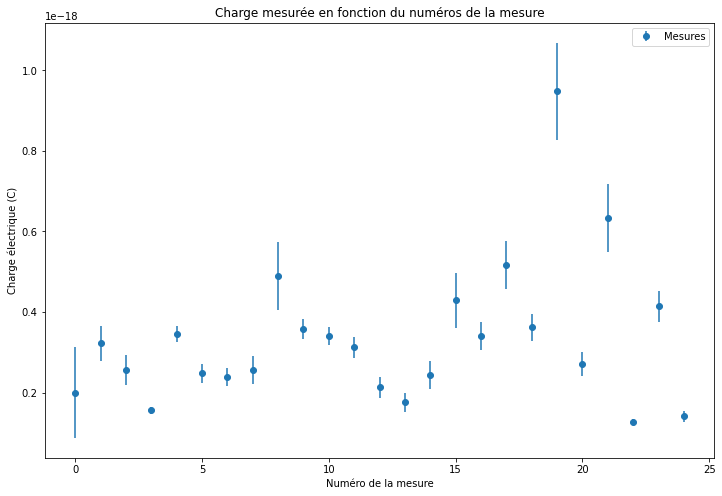

In [30]:
exp=np.arange(0,len(X1),1)
plt.figure(figsize=(12,8))
plt.errorbar(exp, q, yerr=Dq,fmt="o",label="Mesures")
plt.xlabel("Numéro de la mesure")
plt.ylabel("Charge électrique (C)")
plt.title("Charge mesurée en fonction du numéros de la mesure")
plt.legend();

Distribution des charges mesurées :

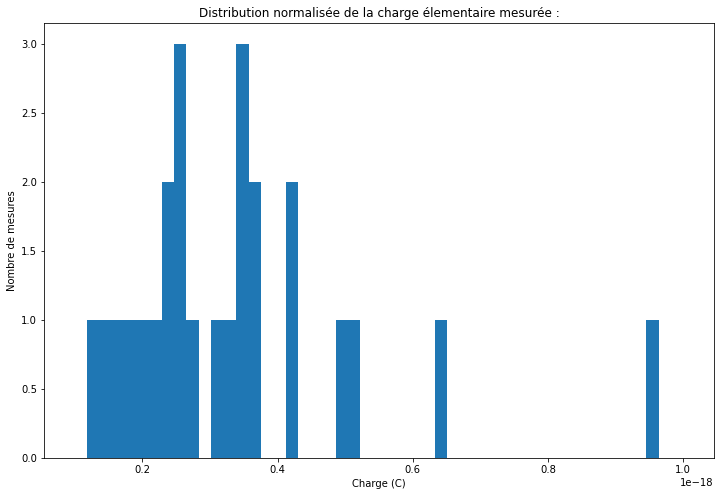

In [38]:
plt.figure(figsize=(12,8))
#NN=plt.hist(q,bins=30,label="Charges mesurées")
NN=plt.hist(q,bins=np.linspace(1*10**(-19),1*10**(-18),50),label="Charges mesurées")
plt.xlabel("Charge (C)")
plt.ylabel("Nombre de mesures")
plt.title("Distribution normalisée de la charge élementaire mesurée :");

Plot de la charge mesurée en fonction du rayon des gouttes :

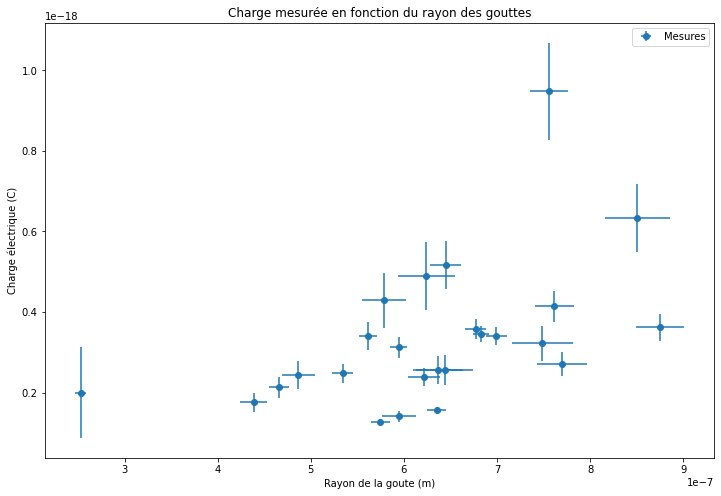

In [32]:
plt.figure(figsize=(12,8))
plt.errorbar(r, q, xerr=Dr, yerr=Dq,fmt="o",label="Mesures")
plt.xlabel("Rayon de la goute (m)")
plt.ylabel("Charge électrique (C)")
plt.title("Charge mesurée en fonction du rayon des gouttes")
plt.legend();

Plot du rayon des gouttes en fonction de leurs vitesses, pour voir si la corrélation en racine carrée apparaît :

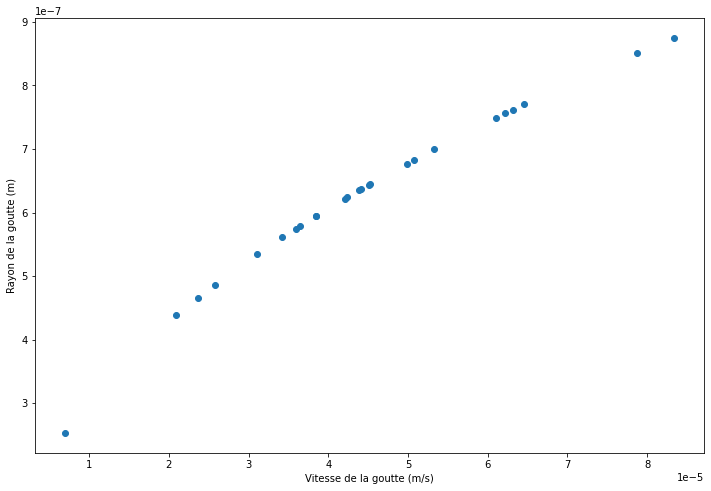

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(v,r)
plt.xlabel("Vitesse de la goutte (m/s)")
plt.ylabel("Rayon de la goutte (m)");

Normalisation des charges mesurées par leurs facteurs multiplicatifs vis-à-vis de la charge élémentaire théorique :

In [34]:
q1norm=q/nbq
q1norm_err=Dq/nbq

La charge élémentaire finale est déterminée par deux méthodes :
- Moyenne arithmétique + propagation des incertitudes,
- Fit de la distribution par une gaussienne.

Distribution des charges élémentaires mesurées et résultats finaux:

Charge élementaire finale (moyenne + propagation des incertitudes): (1.605671571233184e-19 +/- 2.813451173691819e-20) C
Charge élementaire finale (fit) :(1.2808555983736857e-19 +/- 4.7950996987553255e-20) C


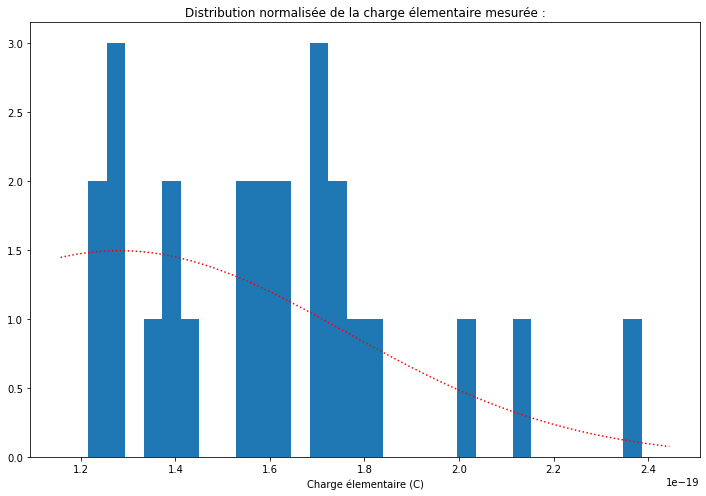

In [35]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


plt.figure(figsize=(12,8))
NN=plt.hist(q1norm,bins=30,label="Charge élementaire mesurée")
counts=NN[0]
bin_edges=NN[1]
bin_center=(bin_edges[:-1]+bin_edges[1:])/2
plt.xlabel("Charge élementaire (C)")
q_mean=np.mean(q1norm)
q_std=np.std(q1norm)
q_err_mes=np.mean(q1norm_err)
q_err_tot=(q_std**2)**0.5
popt,pcov = curve_fit(gaus,bin_center,counts,p0=[10,q_mean,q_std])
xmin, xmax = plt.xlim()
XX = np.linspace(xmin, xmax, 1000)
plt.plot(XX,gaus(XX,*popt),'r:',label='fit')
plt.title("Distribution normalisée de la charge élementaire mesurée :");

print("Charge élementaire finale (moyenne + propagation des incertitudes): ({} +/- {}) C".format(q_mean,q_err_tot))
print("Charge élementaire finale (fit) :({} +/- {}) C".format(popt[1],popt[2]))
#print(popt)

Charge élementaire finale (moyenne + propagation des incertitudes): (1.605671571233184e-19 +/- 2.813451173691819e-20) C
Charge élementaire finale (fit) :(1.2808555983736857e-19 +/- 4.7950996987553255e-20) C


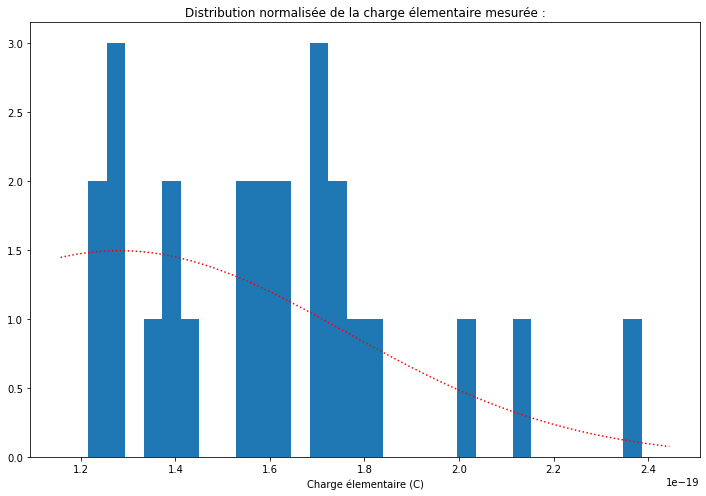

In [36]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

r_cut=r<10**(-6)
dq_cut=Dq<0.5*10**(-18)

plt.figure(figsize=(12,8))
NN=plt.hist(q1norm[r_cut*dq_cut],bins=30,label="Charge élementaire mesurée")
counts=NN[0]
bin_edges=NN[1]
bin_center=(bin_edges[:-1]+bin_edges[1:])/2
plt.xlabel("Charge élementaire (C)")
q_mean=np.mean(q1norm[r_cut*dq_cut])
q_std=np.std(q1norm[r_cut*dq_cut])
q_err_mes=np.mean(q1norm_err[r_cut*dq_cut])
q_err_tot=(q_std**2)**0.5
popt,pcov = curve_fit(gaus,bin_center,counts,p0=[10,q_mean,q_std])
xmin, xmax = plt.xlim()
XX = np.linspace(xmin, xmax, 1000)
plt.plot(XX,gaus(XX,*popt),'r:',label='fit')
plt.title("Distribution normalisée de la charge élementaire mesurée :");

print("Charge élementaire finale (moyenne + propagation des incertitudes): ({} +/- {}) C".format(q_mean,q_err_tot))
print("Charge élementaire finale (fit) :({} +/- {}) C".format(popt[1],popt[2]))
#print(popt)